## Data Workflow

We may want to setup an environment that has all of the tools needed to run this notebook.
If there is ongoing processing we could setup CI as well to automate the build.

In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd 
import rioxarray as riox
# For vector --> raster conversion
from geocube.api.core import make_geocube

In [2]:
all_trails = gpd.read_file("https://opendata.arcgis.com/datasets/d7ad8e150c164c32ab1690658f3fa662_4.geojson")
all_trails.head()

,GISPROD3OSMPTrailsOSMPOBJECTID,GISPROD3OSMPTrailsOSMPOWNER,GISPROD3OSMPTrailsOSMPBICYCLES,GISPROD3OSMPTrailsOSMPTRAILTYPE,GISPROD3OSMPTrailsOSMPSEGMENTID,GISPROD3OSMPTrailsOSMPHORSES,GISPROD3OSMPTrailsOSMPTRLID,GISPROD3OSMPTrailsOSMPMILEAGE,GISPROD3OSMPTrailsOSMPMEASUREDFEET,GISPROD3OSMPTrailsOSMPTRAILNAME,...,GISPROD3OSMPTrailClosuresCLOSUREDURATION,GISPROD3OSMPTrailClosuresWEBLINK,GISPROD3OSMPTrailClosuresCLOSUREAREA,GISPROD3OSMPTrailClosuresTRAILSTATUS,GISPROD3OSMPTrailClosuresCLOSUREREASON,GISPROD3OSMPTrailClosuresLOCATIONDESCRIPTION,GISPROD3OSMPTrailClosuresCONTACT,GISPROD3OSMPTrailClosuresCOMMENTS,GISPROD3OSMPTrailClosuresGLOBALID,geometry
0,644,OSMP,No,Hiking Trail,244-130-127,Yes,244,0.252,1353.0,Wood's Quarry,...,None,None,None,Open,None,None,https://bouldercolorado.gov/osmp/temporary-clo...,None,{D82FC0E1-049B-4B72-AC38-CFF14D734E50},"LINESTRING (-105.28816 39.98546, -105.28815 39..."
1,645,OSMP,No,Hiking Trail,245-059-060,Yes,245,0.445,2350.0,Enchanted Mesa,...,None,None,None,Open,None,None,https://bouldercolorado.gov/osmp/temporary-clo...,None,{DAA4339D-72A8-4275-B461-9DBFFC7B72EF},"LINESTRING (-105.28155 39.99497, -105.28152 39..."
2,646,OSMP,No,Hiking Trail,201-062-127,Yes,201,0.006,48.0,Mesa,...,None,None,None,Open,None,None,https://bouldercolorado.gov/osmp/temporary-clo...,None,{81C07A01-D97A-4808-B736-3057EEF6DB59},"LINESTRING (-105.28566 39.98755, -105.28566 39..."
3,649,OSMP,No,Hiking Trail,264-269-266,No,264,0.219,-9999.0,Amphitheater Express,...,None,None,None,Open,None,None,https://bouldercolorado.gov/osmp/temporary-clo...,None,{FEFCAFFD-7E6F-43C9-9F46-5BC2016DD4A8},"LINESTRING (-105.29163 39.99592, -105.29166 39..."
4,651,OSMP,No,Hiking Trail,256-260-029,Yes,256,0.103,541.0,Flatirons Loop,...,None,None,None,Open,None,None,https://bouldercolorado.gov/osmp/temporary-clo...,None,{FB5D1167-54C4-4EE3-920F-CF7F3CDD4C7F},"LINESTRING (-105.28930 39.99174, -105.28930 39..."


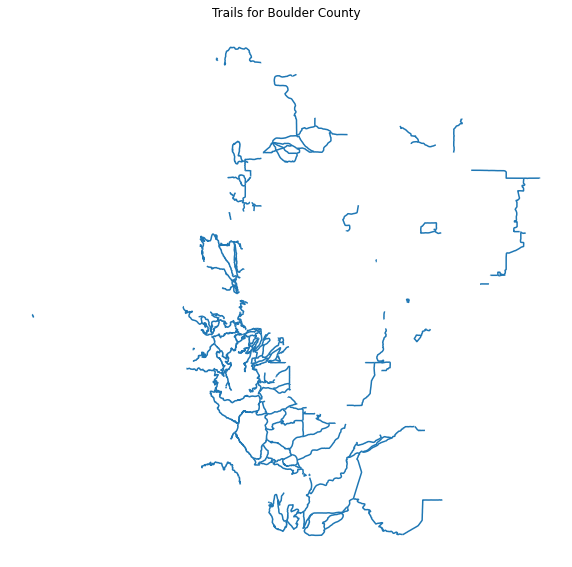

In [3]:
# I could make this plot prettier if you want but for now here are the data
f, ax = plt.subplots(figsize=(10,10))
all_trails.plot(ax=ax)
ax.set(title="Trails for Boulder County")
ax.set_axis_off()
plt.show()

In [4]:
# Data are currently in lat/lon WGS84
all_trails.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
# Adding geocube to my envt - https://gis.stackexchange.com/questions/349447/convert-geodataframe-to-raster/349457
# this may or may not be the best way to rasterize but let's try

# Unique trail identifier (many options here)
all_trails.GISPROD3OSMPTrailsOSMPSEGMENTID

0      244-130-127
1      245-059-060
2      201-062-127
3      264-269-266
4      256-260-029
          ...     
568    300-072-372
569    201-372-072
570    263-267-269
571    201-128-129
572    336-089-092
Name: GISPROD3OSMPTrailsOSMPSEGMENTID, Length: 573, dtype: object

In [6]:
all_trails.total_bounds

array([-105.40664375,   39.913986  , -105.13187452,   40.1164547 ])

In [7]:
# 1 degree at around 45 degrees latitude is roughly  100,000 meters so... to convert
# this is super duper rough for resolution value
res = 1/(100000/200)
res

0.002

In [8]:
all_trails.columns

Index(['GISPROD3OSMPTrailsOSMPOBJECTID', 'GISPROD3OSMPTrailsOSMPOWNER',
       'GISPROD3OSMPTrailsOSMPBICYCLES', 'GISPROD3OSMPTrailsOSMPTRAILTYPE',
       'GISPROD3OSMPTrailsOSMPSEGMENTID', 'GISPROD3OSMPTrailsOSMPHORSES',
       'GISPROD3OSMPTrailsOSMPTRLID', 'GISPROD3OSMPTrailsOSMPMILEAGE',
       'GISPROD3OSMPTrailsOSMPMEASUREDFEET', 'GISPROD3OSMPTrailsOSMPTRAILNAME',
       'GISPROD3OSMPTrailsOSMPGlobalID', 'GISPROD3OSMPTrailsOSMPDogsOLD',
       'GISPROD3OSMPTrailsOSMPDogRegGenOLD',
       'GISPROD3OSMPTrailsOSMPDogRegDescOLD',
       'GISPROD3OSMPTrailsOSMPDIFFICULTY', 'GISPROD3OSMPTrailsOSMPDOGS',
       'GISPROD3OSMPTrailsOSMPDOGREGGEN', 'GISPROD3OSMPTrailsOSMPDOGREGDESC',
       'SHAPESTLength', 'GISPROD3OSMPTrailClosuresOBJECTID',
       'GISPROD3OSMPTrailClosuresCLOSUREDURATION',
       'GISPROD3OSMPTrailClosuresWEBLINK',
       'GISPROD3OSMPTrailClosuresCLOSUREAREA',
       'GISPROD3OSMPTrailClosuresTRAILSTATUS',
       'GISPROD3OSMPTrailClosuresCLOSUREREASON',
       'GISPR

In [9]:

all_trails = gpd.read_file("https://opendata.arcgis.com/datasets/d7ad8e150c164c32ab1690658f3fa662_4.geojson")

# Convert data to raster
trails_raster = make_geocube(vector_data=all_trails, 
                    measurements=["GISPROD3OSMPTrailsOSMPOBJECTID"],
                    #measurements=["GISPROD3OSMPTrailsOSMPSEGMENTID","GISPROD3OSMPTrailsOSMPTRAILNAME"], 
                    resolution=(res, -res))

# Xarray object
trails_raster
# If we want to export  the data??
#out_grid["column_name"].rio.to_raster("my_rasterized_column.tif")

<xarray.Dataset>
Dimensions:                         (x: 139, y: 103)
Coordinates:
  * y                               (y) float64 39.91 39.91 ... 40.12 40.12
  * x                               (x) float64 -105.1 -105.1 ... -105.4 -105.4
    spatial_ref                     int64 0
Data variables:
    GISPROD3OSMPTrailsOSMPOBJECTID  (y, x) float64 nan nan nan ... nan nan nan
Attributes:
    grid_mapping:  spatial_ref

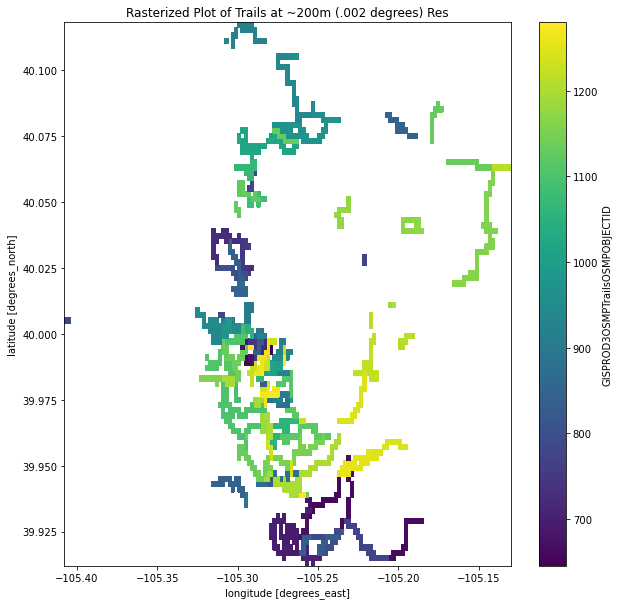

In [10]:
# Plot the data by unique id
f, ax =  plt.subplots(figsize=(10,10))
trails_raster.GISPROD3OSMPTrailsOSMPOBJECTID.plot(ax=ax)
ax.set(title="Rasterized Plot of Trails at ~200m (.002 degrees) Res")
plt.show()